1. Import des bibliothèques

In [2]:
import pandas as pd

2. Import des datas

In [39]:
df = pd.read_csv("data.csv")
df
data = pd.read_csv("data.csv")

In [4]:
print(df.info(),df.describe(),df.head(),df.tail(),df.shape,df.duplicated(),df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STRUCTURE              8402 non-null   object 
 1   STRUCTURE_ID           8402 non-null   object 
 2   STRUCTURE_NAME         8402 non-null   object 
 3   ACTION                 8402 non-null   object 
 4   COU                    8402 non-null   object 
 5   Pays                   8402 non-null   object 
 6   SER                    8402 non-null   object 
 7   Série                  8402 non-null   object 
 8   TIME_PERIOD            8402 non-null   int64  
 9   Année                  0 non-null      float64
 10  OBS_VALUE              8402 non-null   float64
 11  Observation Value      0 non-null      float64
 12  OBS_STATUS             8402 non-null   object 
 13  Observation Status     0 non-null      float64
 14  UNIT_MEASURE           0 non-null      float64
 15  Unit

In [5]:
for i in range(len(df.columns)):
  print(df.columns[i])
  print(df.iloc[:,i].unique(),end = '\n\n\n')


  #sert a rien : STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,Année,Observation Value,OBS_STATUS,Observation Status,UNIT_MEASURE,
  # Unit of Measures,UNIT_MULT,Multiplier,BASE_PER,Base reference period

  # question pour les colonnes SER et Série : SER = diminutif de Série ???

STRUCTURE
['DATAFLOW']


STRUCTURE_ID
['OECD:DF_TEL(1.0)']


STRUCTURE_NAME
['Statistiques sur les télécommunications']


ACTION
['I']


COU
['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'CHL' 'COL' 'EST' 'ISR' 'LVA' 'LTU'
 'SVN' 'OECD']


Pays
['Australie' 'Autriche' 'Belgique' 'Canada' 'Tchéquie' 'Danemark'
 'Finlande' 'France' 'Allemagne' 'Grèce' 'Hongrie' 'Islande' 'Irlande'
 'Italie' 'Japon' 'Corée' 'Luxembourg' 'Mexique' 'Pays-Bas'
 'Nouvelle-Zélande' 'Norvège' 'Pologne' 'Portugal' 'République slovaque'
 'Espagne' 'Suède' 'Suisse' 'Türkiye' 'Royaume-Uni' 'États-Unis' 'Chili'
 'Colombie' 'Estonie' 'Israël' 'Lettonie' 'Lituanie' 'Slovénie'
 'OCDE - Total']


SER
['TEL-ACC-LINE' 'TEL-ACC-PATH' 'TEL-MOB-SUB' 'TEL-MOB-PP' 'TEL-REV-TOT'
 'TEL-REV-USD' 'TEL-INV-TOT' 'TEL-INV-USD' 'TEL-VOIP-SUB' 'TEL-CATV-SUB'
 'TEL-ACC-PATH100' 'TEL-MOB-SUB100']


Séri

In [40]:
#suppression des colonnes inutiles :

df = df.drop(columns=["STRUCTURE","STRUCTURE_ID","STRUCTURE_NAME","ACTION","Année","Observation Value","OBS_STATUS",
                 "Observation Status","UNIT_MEASURE","Unit of Measures","UNIT_MULT","Multiplier","BASE_PER",
                 "Base reference period","Pays","Série"])


In [45]:
df
#enlever cou et série
#pivot

,COU,SER,TIME_PERIOD,OBS_VALUE
0,AUS,TEL-ACC-LINE,2015,8.490000e+06
1,AUS,TEL-ACC-PATH,2015,4.141300e+07
2,AUS,TEL-MOB-SUB,2015,2.616000e+07
3,AUS,TEL-MOB-PP,2015,9.255000e+06
4,AUS,TEL-REV-TOT,2015,4.191950e+10
...,...,...,...,...
8397,EST,TEL-ACC-PATH100,1996,3.524000e+01
8398,EST,TEL-MOB-SUB100,1996,4.240000e+00
8399,ISR,TEL-ACC-PATH100,1996,3.490000e+01
8400,OECD,TEL-ACC-PATH100,1996,4.915000e+01


In [31]:
#correspondances entre ser et Série et cou et pays
def correspondance(text):
    ser = ['TEL-ACC-LINE' ,'TEL-ACC-PATH', 'TEL-MOB-SUB', 'TEL-MOB-PP', 'TEL-REV-TOT'
        'TEL-REV-USD', 'TEL-INV-TOT', 'TEL-INV-USD', 'TEL-VOIP-SUB', 'TEL-CATV-SUB'
        'TEL-ACC-PATH100', 'TEL-MOB-SUB100']
    serie = ["Total des lignes d'accès téléphoniques",
        "Total des voies d'accès de communication",
        'Total des abonnements au téléphone cellulaire mobile',
        'Abonnements au téléphone cellulaire mobile utilisant des cartes prépayés',
        'Total des recettes des télécommunications',
        'Total des recettes des télécommunications USD',
        'Investissements totaux dans les télécommunications (pour lignes fixes et réseau mobile cellulaire)',
        'Investissements totaux dans les télécommunications (pour lignes fixes et réseau mobile cellulaire) USD',
        'Total Internet Protocol (IP) telephone subscriptions',
        'Nombre d’abonnés à la télévision par câble',
        "Total des voies d'accès de communication pour 100 habitants",
        'Total des abonnements au téléphone cellulaire mobile pour 100 habitants']
    

    COU = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL',
        'IRL', 'ITA', 'JPN' ,'KOR', 'LUX' ,'MEX' ,'NLD', 'NZL','NOR', 'POL', 'PRT','SVK',
         'ESP', 'SWE' ,'CHE', 'TUR', 'GBR', 'USA' ,'CHL' ,'COL', 'EST', 'ISR', 'LVA', 'LTU'
         'SVN', 'OECD']


    Pays  = ['Australie' ,'Autriche' ,'Belgique', 'Canada' ,'Tchéquie' ,'Danemark'
        'Finlande' ,'France', 'Allemagne', 'Grèce','Hongrie', 'Islande', 'Irlande'
        'Italie', 'Japon' ,'Corée', 'Luxembourg', 'Mexique','Pays-Bas',
        'Nouvelle-Zélande', 'Norvège', 'Pologne' ,'Portugal', 'République slovaque'
        'Espagne', 'Suède', 'Suisse', 'Türkiye', 'Royaume-Uni', 'États-Unis' ,'Chili'
        'Colombie', 'Estonie' ,'Israël', 'Lettonie' ,'Lituanie' ,'Slovénie','OCDE - Total']
    
    for i in range(len(ser)):
        if ser[i] == text:
            return serie[i]
    
    for i in range(len(COU)):
        if COU[i] == text:
            return Pays[i]
    
    return "erreur de donnée d'entrée"

#correspondances entre ser et Série et cou et pays
def correspondance_inverce(text):
    ser = ['TEL-ACC-LINE' ,'TEL-ACC-PATH', 'TEL-MOB-SUB', 'TEL-MOB-PP', 'TEL-REV-TOT'
        'TEL-REV-USD', 'TEL-INV-TOT', 'TEL-INV-USD', 'TEL-VOIP-SUB', 'TEL-CATV-SUB'
        'TEL-ACC-PATH100', 'TEL-MOB-SUB100']
    serie = ["Total des lignes d'accès téléphoniques",
        "Total des voies d'accès de communication",
        'Total des abonnements au téléphone cellulaire mobile',
        'Abonnements au téléphone cellulaire mobile utilisant des cartes prépayés',
        'Total des recettes des télécommunications',
        'Total des recettes des télécommunications USD',
        'Investissements totaux dans les télécommunications (pour lignes fixes et réseau mobile cellulaire)',
        'Investissements totaux dans les télécommunications (pour lignes fixes et réseau mobile cellulaire) USD',
        'Total Internet Protocol (IP) telephone subscriptions',
        'Nombre d’abonnés à la télévision par câble',
        "Total des voies d'accès de communication pour 100 habitants",
        'Total des abonnements au téléphone cellulaire mobile pour 100 habitants']
    

    COU = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL',
        'IRL', 'ITA', 'JPN' ,'KOR', 'LUX' ,'MEX' ,'NLD', 'NZL','NOR', 'POL', 'PRT','SVK',
         'ESP', 'SWE' ,'CHE', 'TUR', 'GBR', 'USA' ,'CHL' ,'COL', 'EST', 'ISR', 'LVA', 'LTU'
         'SVN', 'OECD']


    Pays  = ['Australie' ,'Autriche' ,'Belgique', 'Canada' ,'Tchéquie' ,'Danemark'
        'Finlande' ,'France', 'Allemagne', 'Grèce','Hongrie', 'Islande', 'Irlande'
        'Italie', 'Japon' ,'Corée', 'Luxembourg', 'Mexique','Pays-Bas',
        'Nouvelle-Zélande', 'Norvège', 'Pologne' ,'Portugal', 'République slovaque'
        'Espagne', 'Suède', 'Suisse', 'Türkiye', 'Royaume-Uni', 'États-Unis' ,'Chili'
        'Colombie', 'Estonie' ,'Israël', 'Lettonie' ,'Lituanie' ,'Slovénie','OCDE - Total']
    
    for i in range(len(serie)):
        if serie[i] == text:
            return ser[i]
    
    for i in range(len(Pays)):
        if Pays[i] == text:
            return COU[i]
    
    return "erreur de donnée d'entrée"

#test
print(correspondance("TEL-ACC-LINE"))
print(correspondance_inverce("Total des lignes d'accès téléphoniques"))

Total des lignes d'accès téléphoniques
TEL-ACC-LINE


In [84]:
# colonne série non exploitable => pivot
#dff = df.pivot(index ="COU",columns=['SER','TIME_PERIOD'],values='OBS_VALUE')
dff = df.pivot(index =['TIME_PERIOD',"COU"],columns='SER',values='OBS_VALUE')
dff.reset_index()

SER,TIME_PERIOD,COU,TEL-ACC-LINE,TEL-ACC-PATH,TEL-ACC-PATH100,TEL-CATV-SUB,TEL-INV-TOT,TEL-INV-USD,TEL-MOB-PP,TEL-MOB-SUB,TEL-MOB-SUB100,TEL-REV-TOT,TEL-REV-USD,TEL-VOIP-SUB
0,1996,AUS,9439525.0,13429525.0,73.69,NaN,2.777955e+09,NaN,NaN,3990000.0,21.89,NaN,NaN,NaN
1,1996,AUT,3698447.0,4297251.0,53.99,NaN,5.833546e+08,NaN,NaN,598804.0,7.52,3.087822e+09,NaN,NaN
2,1996,BEL,4780148.0,5258320.0,51.77,NaN,8.455400e+08,NaN,NaN,478172.0,4.71,3.438209e+09,NaN,NaN
3,1996,CAN,NaN,3420318.0,11.55,NaN,4.125662e+09,NaN,NaN,3420318.0,11.55,1.817048e+10,NaN,NaN
4,1996,CHE,4170820.0,4833520.0,68.35,NaN,2.278000e+09,NaN,36000.0,662700.0,9.37,9.532000e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,2018,SVK,324020.0,9073720.0,166.59,382458.0,3.558106e+08,4.186007e+08,2104043.0,7241702.0,132.95,1.704869e+09,2.005728e+09,360661.0
843,2018,SVN,122121.0,3196330.0,154.41,254859.0,2.576745e+08,3.031465e+08,498713.0,2465857.0,119.12,1.084092e+09,1.275403e+09,554355.0
844,2018,SWE,888880.0,19179407.0,188.49,2431000.0,1.548500e+10,1.781933e+09,3222772.0,14316905.0,140.70,5.073396e+10,5.838201e+09,1270822.0
845,2018,TUR,11633461.0,105158686.0,129.18,1248240.0,9.404070e+09,1.947012e+09,34382665.0,80117999.0,98.42,5.903039e+10,1.222161e+10,1281814.0


/Users/lilia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


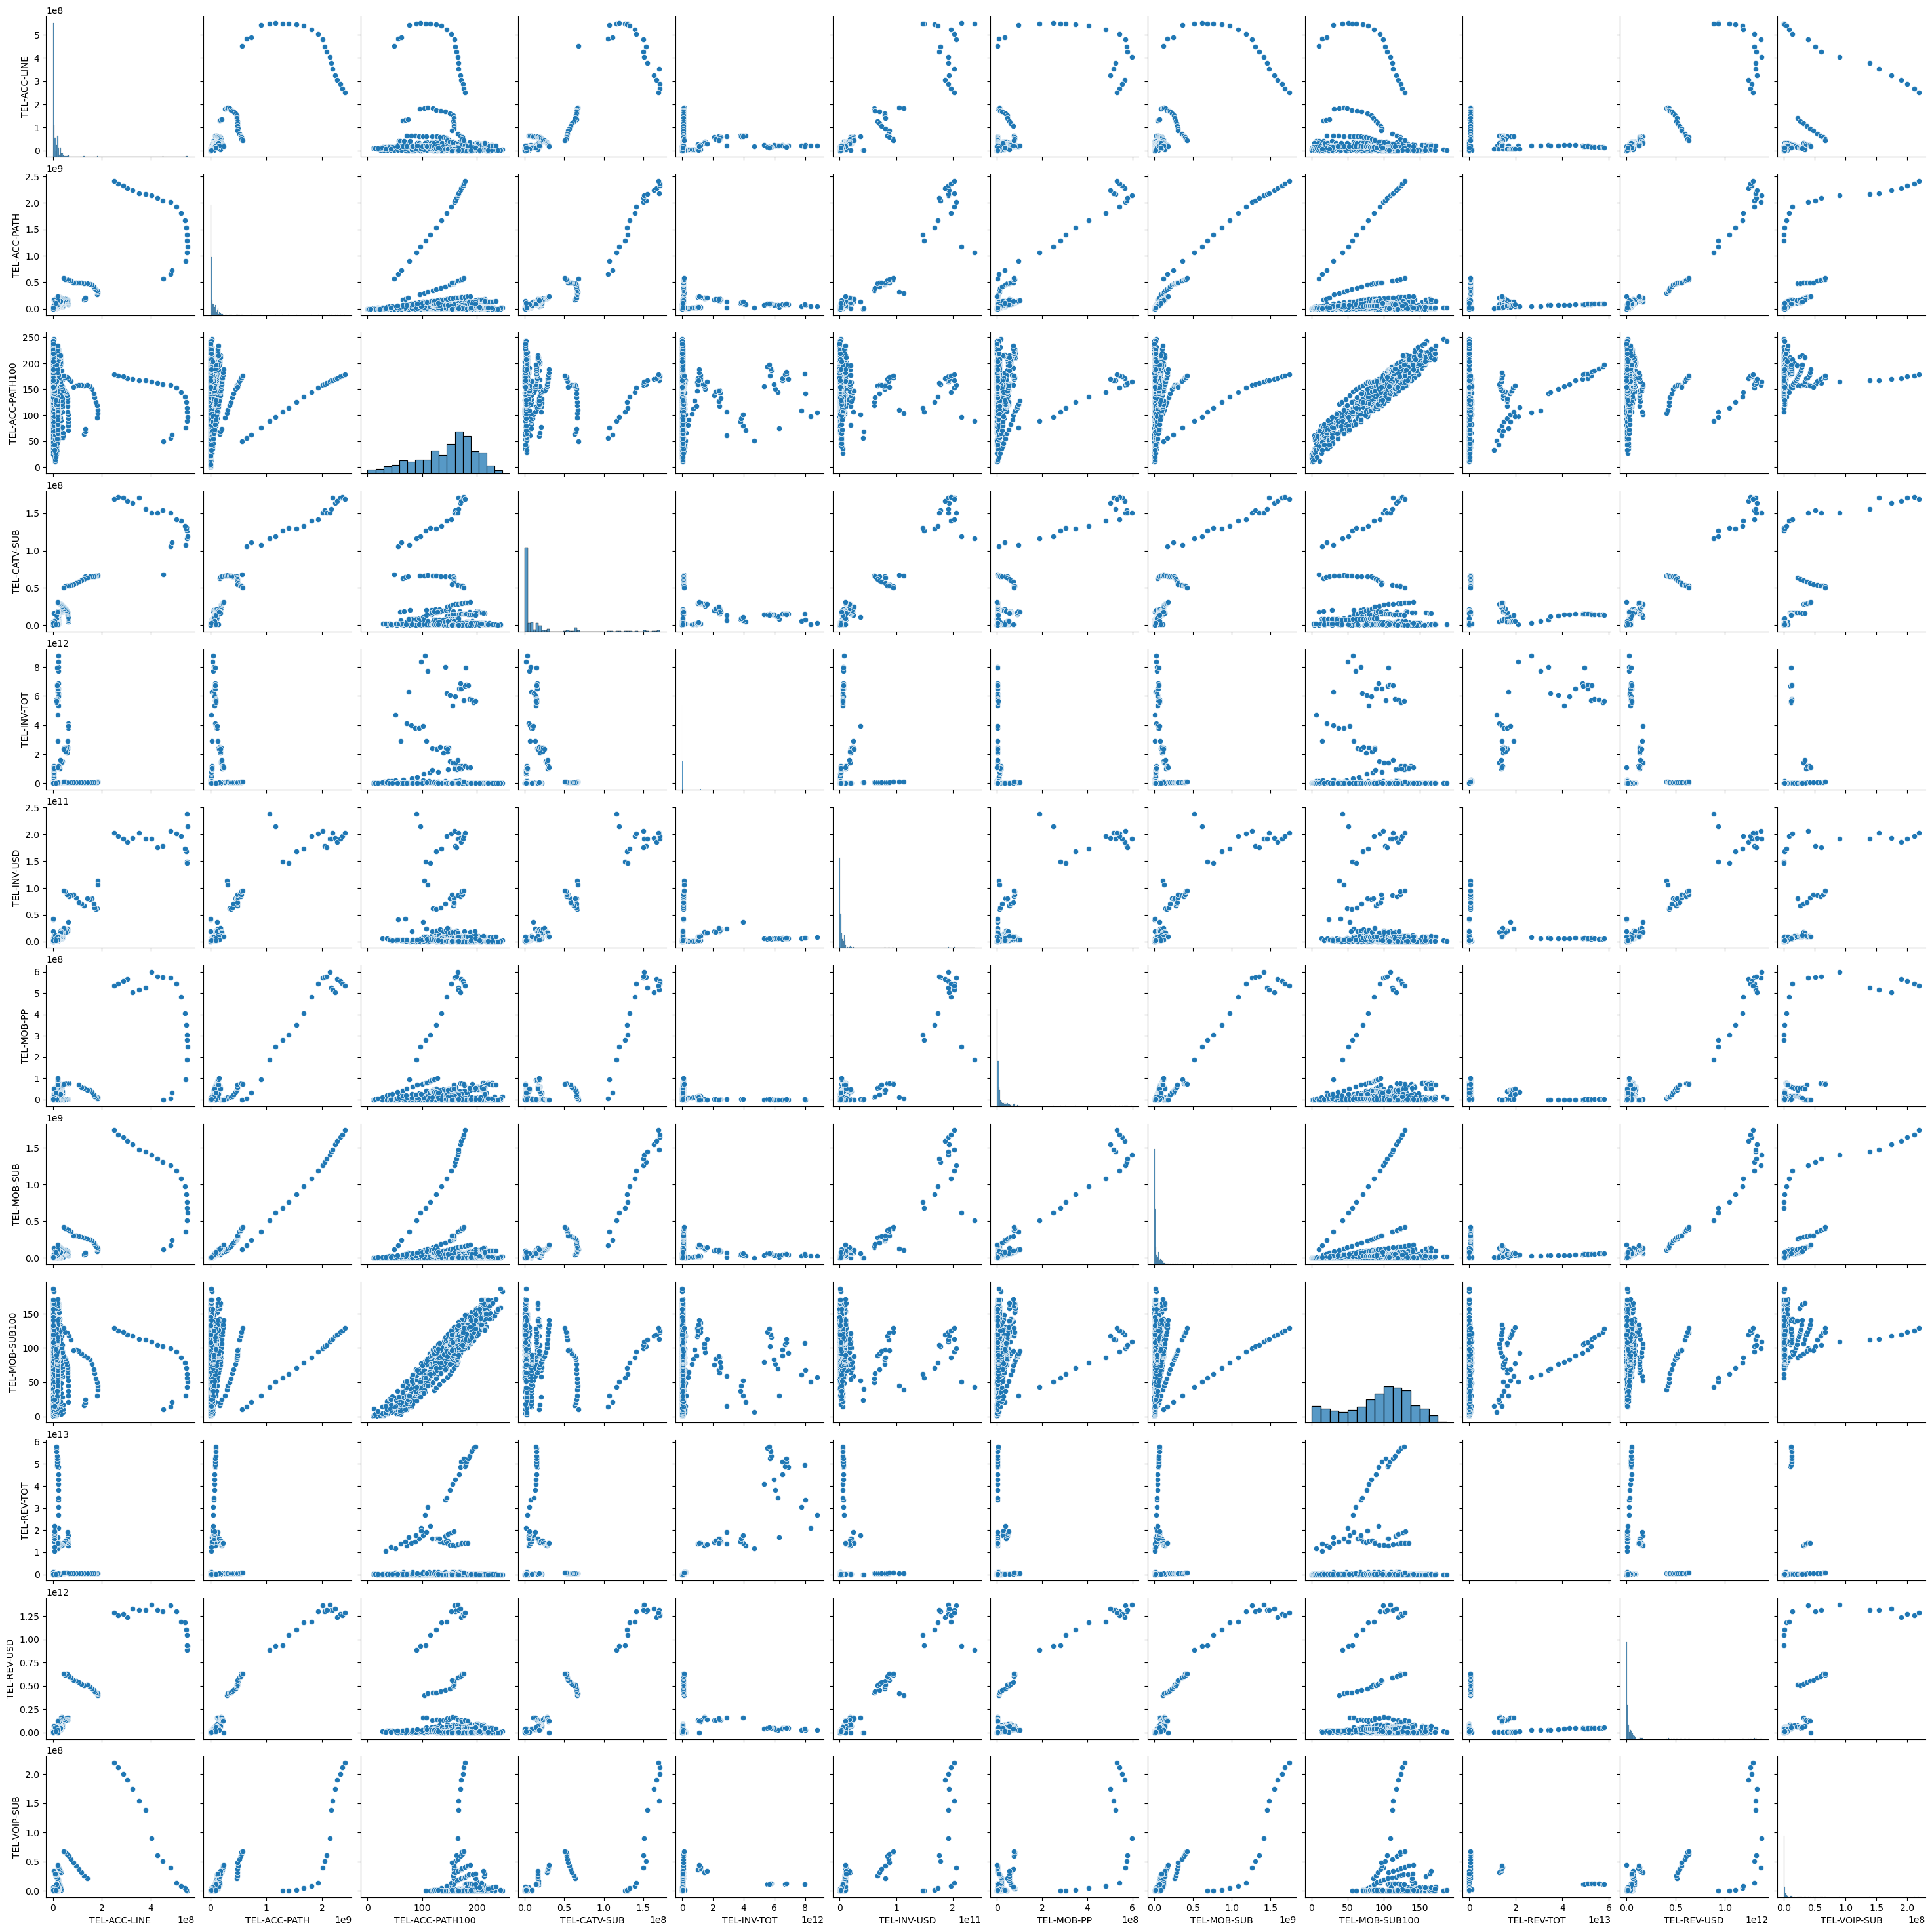

In [85]:
#analyse 2:
import seaborn as sns

sns.pairplot(dff)